<h2>Met tjr les imports en haut

In [4]:
import os
from skimage import io
from skimage.transform import resize
import numpy as np
from skimage.feature import hog, local_binary_pattern
from skimage.filters import gabor
import cv2
import matplotlib.pyplot as plt
import mahotas 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from skimage.feature import graycomatrix, graycoprops
import torch



<h3>la fonction qui va calculer la matrice de distance

In [5]:

def compute_distance_matrix(images, descriptor_function, feature_size=128):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    features = []
    for image in images:
        try:
            feature = descriptor_function(image)

            if isinstance(feature, np.float64) or np.isscalar(feature):
                feature = [feature]

            feature = np.array(feature)

            if feature.size < feature_size:
                feature = np.pad(feature, (0, feature_size - feature.size), mode='constant')
            elif feature.size > feature_size:
                feature = feature[:feature_size]

            features.append(feature)
        except Exception as e:
            print(f"Error processing image: {e}")
            features.append([0] * feature_size)

    features_tensor = torch.tensor(features, dtype=torch.float32, device=device)

    distance_matrix = torch.cdist(features_tensor, features_tensor, p=2)
    return distance_matrix


<h3>l'affichage de la matrice

In [6]:
def display_distance_matrix(distance_matrix, title):
    if isinstance(distance_matrix, torch.Tensor):
        distance_matrix = distance_matrix.cpu().numpy()
    plt.imshow(distance_matrix, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.show()


<h3>Importer les image

In [7]:
food_directory = 'archive/training/food'
non_food_directory = 'archive/training/non_food'

food_image_paths = [os.path.join(food_directory, filename) for filename in os.listdir(food_directory) if filename.endswith('.png') or filename.endswith('.jpg')]
food_images = [io.imread(image_path) for image_path in food_image_paths]

non_food_image_paths = [os.path.join(non_food_directory, filename) for filename in os.listdir(non_food_directory) if filename.endswith('.png') or filename.endswith('.jpg')]
non_food_images = [io.imread(image_path) for image_path in non_food_image_paths]

image_paths = food_image_paths + non_food_image_paths
images = food_images + non_food_images


<h2>VOICI LA SQUELETTE DU CODE (peut etre modifiee)

In [ ]:
import torch
import torchvision.transforms as transforms


def extract_DLmodel_features(img):
    # Check if GPU is available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load a pretrained model
    model = "MET LE NOM D'UN MODEL PRE-ENTRAINE ICI"
    model = model.eval()  # Set the model to evaluation mode
    model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove the classification head
    model = model.to(device)  # Move the model to the GPU/CPU

    # TU PEUX MODIFIER CETTE PARTIE SI TU VEUX, TU PEUX AJOUTER DES TRANSFORMATIONS OU CHANGER LES TRANSFORMATIONS EXISTANTES OU MODIFIER LES PARAMETRES DES TRANSFORMATIONS
    preprocess = transforms.Compose([
        transforms.ToPILImage(),  # Convert NumPy array to PIL image 
        transforms.Resize((224, 224)),  # Resize image to 224x224
        transforms.ToTensor(),  # Convert image to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
    ])

    # Preprocess the image
    img_tensor = preprocess(img)
    img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension
    img_tensor = img_tensor.to(device)  # Move the tensor to the GPU/CPU

    # Extract features
    with torch.no_grad():
        features = model(img_tensor)

    # Flatten the features into a 1D array
    feat = features.view(-1).cpu().numpy()  # Move back to CPU before converting to NumPy
    return feat


In [ ]:
distance_matrix = compute_distance_matrix(images, "MET LE NOM DE LA FONCTION DE DESCRIPTOR ICI")

display_distance_matrix(distance_matrix, "Matrice des distances entre les images")

<H3>VOICI UN EXEMPLE POUR T'AIDER

In [8]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
import numpy as np
import cv2

def extract_resnet50_features(img):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load a pretrained ResNet-50 model
    model = resnet50(pretrained=True)
    model = model.eval()  
    model = torch.nn.Sequential(*list(model.children())[:-1]) 
    model = model.to(device)  

    preprocess = transforms.Compose([
        transforms.ToPILImage(),  
        transforms.Resize((224, 224)),  
        transforms.ToTensor(),  
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
    ])

    img_tensor = preprocess(img)
    img_tensor = img_tensor.unsqueeze(0)  
    img_tensor = img_tensor.to(device)  

    with torch.no_grad():
        features = model(img_tensor)

    feat = features.view(-1).cpu().numpy()  
    return feat


/home/benk/anaconda3/envs/ML/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/benk/anaconda3/envs/ML/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Error processing image: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]
Error processing image: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]
Error processing image: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]
Error processing image: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]
Error processing image: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]
Error processing image: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]
Error processing image: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]
Error processing image: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]


/tmp/ipykernel_17277/169261835.py:27: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  features_tensor = torch.tensor(features, dtype=torch.float32, device=device)


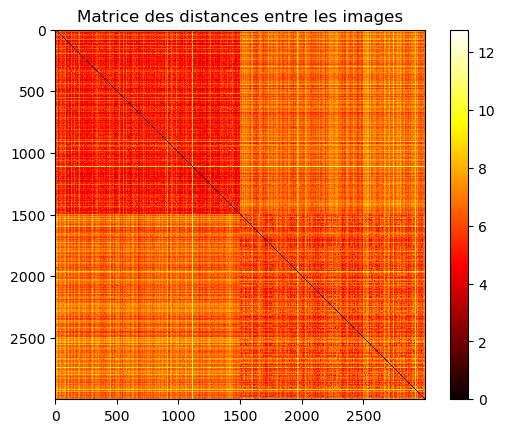

In [9]:
distance_matrix = compute_distance_matrix(images, extract_resnet50_features)

display_distance_matrix(distance_matrix, "Matrice des distances entre les images")


<h2> MAINTENANT A TOI DE JOUER</h2>
<h4>Tu dois chercher des models du computer vision ou deep learning qui sont deja pre entrainer, cette squelette peut ne pas marcher avec tout les models, si tu devras modifier le code d'un model ce n'est pas un probleme, tu peut jouer avec les paramettres pour auguementer la performence, tu dois savoir que chaque model a ces paramettres donc pas forcement de mettre les meme pour tt le monde.</h4>
<h4>les dfficultes que tu vas rencontrer sont de trouver d'abord des models, apres de choisir les bon paramettres, et enfin c'est que a chaque fois tu execute ca va prendre beacoups de temps</h4>
<h4>make sure to not reuse the same models that i have already used! 